In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
t1_RF_h = pd.read_csv('task1 RF_human_FI.csv')
t1_RF_f = pd.read_csv('task1 RF_full_FI.csv')
t1_XGB_h = pd.read_csv('task1 XGB_human_FI.csv')
t1_XGB_f = pd.read_csv('task1 XGB_full_FI.csv')

In [6]:
t1_RF_h.rename(columns = {'Unnamed: 0':'name', '0':'importance'},inplace = True)
t1_RF_f.rename(columns = {'Unnamed: 0':'name', '0':'importance'},inplace = True)
t1_XGB_h.rename(columns = {'Unnamed: 0':'name', '0':'importance'},inplace = True)
t1_XGB_f.rename(columns = {'Unnamed: 0':'name', '0':'importance'},inplace = True)

In [7]:
display(t1_RF_f)

,name,importance
0,Coton,0.080384
1,price,0.078147
2,season_winter,0.078139
3,Elasthanne,0.072993
4,tshirt_standard_45/65cm,0.066400
...,...,...
91,embellishments_zippers,0.000006
92,embellishments_fur,0.000006
93,col_bénit,0.000005
94,pattern type_animal,0.000005


In [11]:
display(t1_RF_f['name'].values)
price_list = ['price']
name_list = ['basique', 'brodé', 'cropped', 'côtelé', 'dentelle', 'débardeur', 'fines', 'imprimé', 'maille', 'message']
style_shape_list = ['tshirt_standard_45/65cm','tshirt_court_(<45cm)','body','tshirt_long_(>65cm)',
                   'tshirt_bandeau','tshirt_asymétrique','dos_nu','cache_coeur']
style_sleeve_list = ['bretelles','sans_manches','manches_courtes','manches_longues',
                    'manches_3/4']
style_collar_list = ['col_rond','col_v','col_batea','divers','col_carré',
                    'col_monta','sans_col','col_rapporté','col_montant','col_bénitier','col_fendu','col_roulé','col_polo','col_bateau','col_bénit']
launch_season_list = ['season_winter','season_summer']
colour_list = ['color_red','color_yellow','color_white','color_black','color_beige','color_pink','color_green','color_blue','color_brown','color_orange',
              'color_purple','color_grey']
composition_list = ['Coton','Elasthanne','Polyester','Viscose','Polyamide','Lin','Modal',
                   'Fibre metallisée','Acrylique','Polyamide enduit','Autres fibres','Lyocell']
top_sil_list = ['tops silhouette_crop top','tops silhouette_regular',
               'tops silhouette_loose/relaxed','tops silhouette_tight']
shoulder_list = ['shoulders_spaghetti strap','shoulders_covered shoulders','shoulders_wide strap',
                'shoulders_one shoulder','shoulders_off shoulder']
pattern_list = ['pattern type_solid color','pattern type_stripes','pattern type_text/numbers/letters',
               'pattern type_metallic','pattern type_floral','pattern type_graphics','pattern type_polka dots','pattern type_squares/diamonds','pattern type_animal']
fallback_pattern_list = ['pattern type fallback_solid colors','pattern type fallback_full print',
                        'pattern type fallback_positional print','pattern type fallback_fabric/texture']
embellishment_list = ['embellishments_simple','embellishments_sequins','embellishments_fabric embellishment','embellishments_buttons','embellishments_fringe',
                     'embellishments_pockets','embellishments_tie closure','embellishments_zippers','embellishments_fur']

array(['Coton', 'price', 'season_winter', 'Elasthanne',
       'tshirt_standard_45/65cm', 'bretelles', 'season_summer',
       'col_rond', 'sans_manches', 'manches_courtes', 'col_v',
       'Polyester', 'Viscose', 'basique', 'col_batea', 'débardeur',
       'divers', 'color_red', 'color_yellow', 'color_white',
       'color_black', 'manches_longues',
       'pattern type fallback_solid colors', 'embellishments_simple',
       'pattern type_solid color', 'color_beige',
       'tops silhouette_crop top', 'color_pink',
       'shoulders_spaghetti strap', 'color_green', 'color_blue',
       'color_brown', 'tshirt_court_(<45cm)',
       'shoulders_covered shoulders', 'col_carré', 'color_orange',
       'color_purple', 'manches_3/4', 'pattern type fallback_full print',
       'color_grey', 'dentelle', 'Polyamide', 'Lin', 'body', 'Modal',
       'tops silhouette_regular', 'col_monta', 'pattern type_stripes',
       'fines', 'imprimé', 'cropped', 'brodé', 'sans_col',
       'pattern type fallb

In [12]:
full_data_list = [price_list,name_list,style_shape_list,style_sleeve_list,style_collar_list,launch_season_list,colour_list,composition_list,top_sil_list,shoulder_list,pattern_list,
                  fallback_pattern_list,embellishment_list]
human_data_list = [price_list,name_list,style_shape_list,style_sleeve_list,style_collar_list,launch_season_list,colour_list,composition_list]
for i in range(len(full_data_list)):
    print(len(full_data_list[i]))

1
10
8
5
15
2
12
12
4
5
9
4
9


In [13]:
attribute_name_list = ['price','name','shape style','sleeve style','collar style','launch season','colour','composition','Top silhouette','shoulder','pattern','fallback pattern','embellishment']



# Full RF

In [91]:
full_fi_RF = [0,0,0,0,0,0,0,0,0,0,0,0,0]
for i in range(len(t1_RF_f)):
    for j in range(len(full_data_list)):
        if t1_RF_f.loc[i,'name'] in full_data_list[j]:
            full_fi_RF[j] += t1_RF_f.loc[i,'importance']
display(full_fi_RF)

[0.07814690335417647,
 0.04949632067033796,
 0.07778577970389478,
 0.1451956275853397,
 0.11702848231348831,
 0.13677426506930362,
 0.10642226476273337,
 0.2171297729518518,
 0.011521139057612272,
 0.01595025095636892,
 0.014347796088483992,
 0.016507841894907203,
 0.013693555591501773]

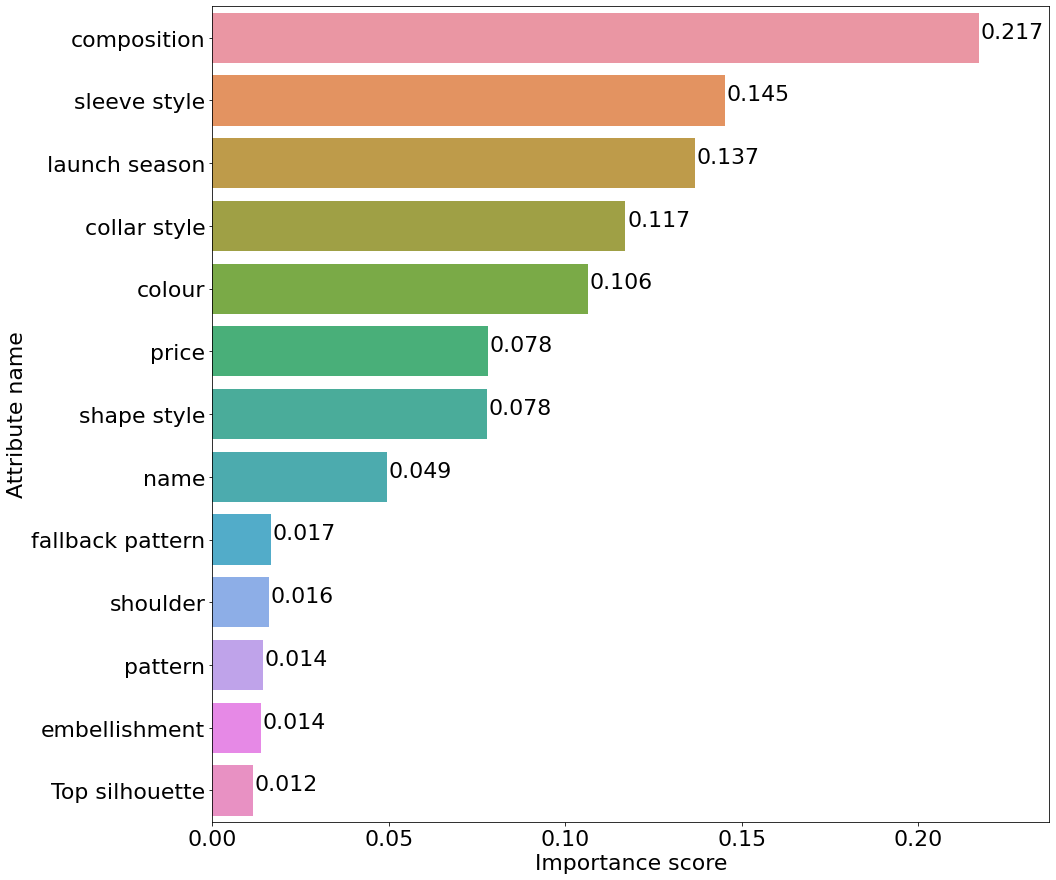

In [92]:
plt.figure(figsize=(15,15))
# sorted_counts = data_table['Elasthanne'].value_counts()
# print(sorted_counts.head())

full_fi_RF_table = pd.DataFrame(full_fi_RF)
full_fi_RF_table.index = attribute_name_list
full_fi_RF_table.rename(columns = {0:'importance score'},inplace = True)

full_fi_RF_table = full_fi_RF_table.sort_values(by ='importance score', ascending = False)

x_values = full_fi_RF_table.values.reshape(13,)

g = sns.barplot(y=full_fi_RF_table.index,
                x=x_values,
                orient = 'h')

plt.xticks(fontsize = 22)
plt.yticks(fontsize = 22)

g.set_ylabel('Attribute name', fontsize=22)
g.set_xlabel('Importance score', fontsize=22)
plt.xlim(0,x_values[0]+0.020)

for i in range(13):
    g.text(x_values[i]+5e-4,
           i,
           np.round(x_values[i],3), 
           color="black",ha="left",
          fontsize = 22)
plt.savefig("../../../saved_figs/Feature Importance/task1 FI RF FULL ATTRI.pdf",dpi=1200,bbox_inches = 'tight')
plt.show()

In [68]:
full_fi_RF_table.rename(columns = {0:'importance score'},inplace = True)
display(full_fi_RF_table)

,importance score
composition,0.217130
sleeve style,0.145196
launch season,0.136774
collar style,0.117028
colour,0.106422
price,0.078147
shape style,0.077786
name,0.049496
fallback pattern,0.016508
shoulder,0.015950


In [69]:
full_fi_RF_table.values.shape

(13, 1)

# Full XGB

In [81]:
full_fi_RF = [0,0,0,0,0,0,0,0,0,0,0,0,0]
for i in range(len(t1_XGB_f)):
    for j in range(len(full_data_list)):
        if t1_XGB_f.loc[i,'name'] in full_data_list[j]:
            full_fi_RF[j] += t1_XGB_f.loc[i,'importance']
display(full_fi_RF)

[0.027825153999999998,
 0.0879084179,
 0.057620863599999995,
 0.11132167100000001,
 0.1551445935,
 0.037391644,
 0.1158156167,
 0.27676227049999996,
 0.041717785,
 0.029339728839999996,
 0.030888391599999995,
 0.007606835699999999,
 0.0206570315]

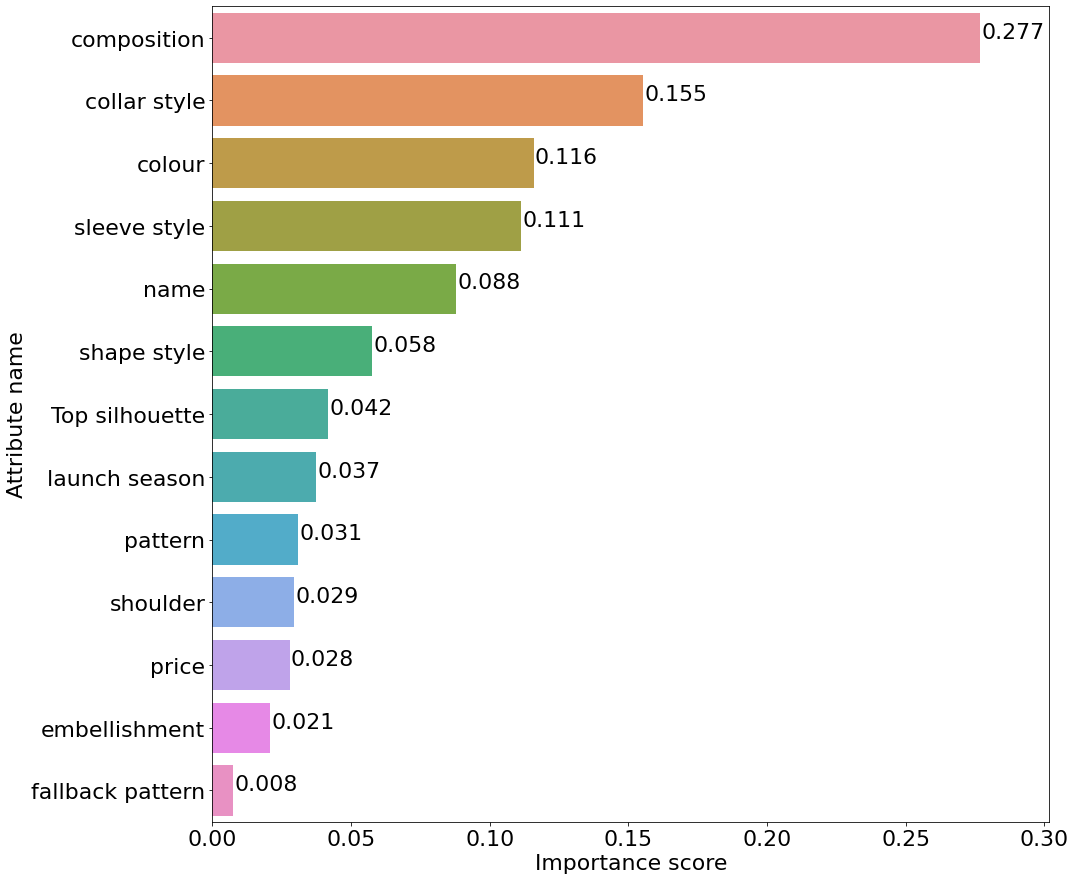

In [85]:
plt.figure(figsize=(15,15))
# sorted_counts = data_table['Elasthanne'].value_counts()
# print(sorted_counts.head())

full_fi_RF_table = pd.DataFrame(full_fi_RF)
full_fi_RF_table.index = attribute_name_list
full_fi_RF_table.rename(columns = {0:'importance score'},inplace = True)

full_fi_RF_table = full_fi_RF_table.sort_values(by ='importance score', ascending = False)

x_values = full_fi_RF_table.values.reshape(13,)

g = sns.barplot(y=full_fi_RF_table.index,
                x=x_values,
                orient = 'h')

plt.xticks(fontsize = 22)
plt.yticks(fontsize = 22)

g.set_ylabel('Attribute name', fontsize=22)
g.set_xlabel('Importance score', fontsize=22)
plt.xlim(0,x_values[0]+0.025)

for i in range(13):
    g.text(x_values[i]+5e-4,
           i,
           np.round(x_values[i],3), 
           color="black",ha="left",
          fontsize = 22)
plt.savefig("../../../saved_figs/Feature Importance/task1 FI XGB FULL ATTRI.pdf",dpi=1200,bbox_inches = 'tight')
plt.show()

# Human RF

In [93]:
full_fi_RF = [0,0,0,0,0,0,0,0]
for i in range(len(t1_RF_h)):
    for j in range(len(full_fi_RF)):
        if t1_RF_h.loc[i,'name'] in full_data_list[j]:
            full_fi_RF[j] += t1_RF_h.loc[i,'importance']
display(full_fi_RF)

[0.08020007941083378,
 0.046732826817727814,
 0.08179660632505517,
 0.15275701939687716,
 0.12365942842989018,
 0.149745464555593,
 0.13546794452554367,
 0.22964063053847938]

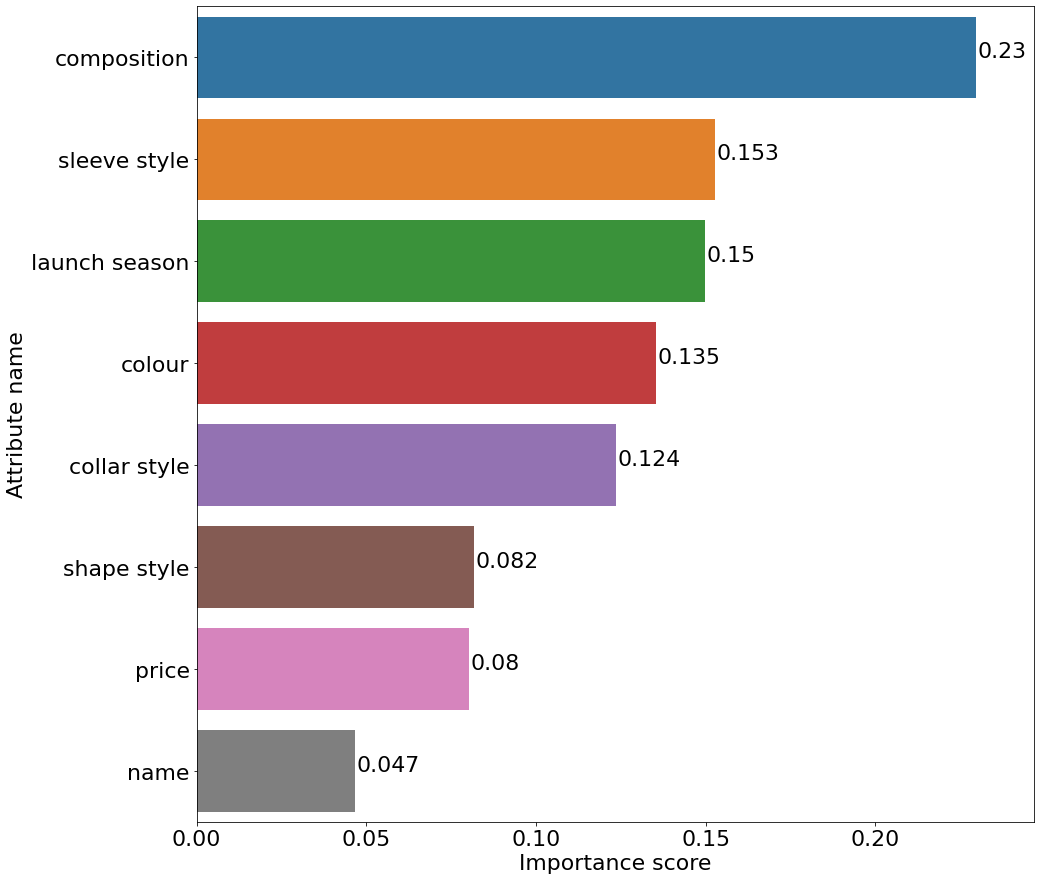

In [94]:
plt.figure(figsize=(15,15))
# sorted_counts = data_table['Elasthanne'].value_counts()
# print(sorted_counts.head())

full_fi_RF_table = pd.DataFrame(full_fi_RF)
full_fi_RF_table.index = attribute_name_list[:8]
full_fi_RF_table.rename(columns = {0:'importance score'},inplace = True)

full_fi_RF_table = full_fi_RF_table.sort_values(by ='importance score', ascending = False)

x_values = full_fi_RF_table.values.reshape(8,)

g = sns.barplot(y=full_fi_RF_table.index,
                x=x_values,
                orient = 'h')
plt.xticks(fontsize = 22)
plt.yticks(fontsize = 22)
g.set_ylabel('Attribute name', fontsize=22)
g.set_xlabel('Importance score', fontsize=22)
plt.xlim(0,x_values[0]+0.017)

for i in range(8):
    g.text(x_values[i]+5e-4,
           i,
           np.round(x_values[i],3), 
           color="black",ha="left",fontsize = 22)
plt.savefig("../../../saved_figs/Feature Importance/task1 FI RF HUMAN ATTRI.pdf",dpi=1200,bbox_inches = 'tight')
plt.show()

# Human XGB

In [95]:
full_fi_RF = [0,0,0,0,0,0,0,0]
for i in range(len(t1_XGB_h)):
    for j in range(len(full_fi_RF)):
        if t1_XGB_h.loc[i,'name'] in full_data_list[j]:
            full_fi_RF[j] += t1_XGB_h.loc[i,'importance']
display(full_fi_RF)

[0.03910681,
 0.05826683835000001,
 0.08563898703,
 0.111581561,
 0.1552247055,
 0.073878886,
 0.13563992339999997,
 0.3406622389]

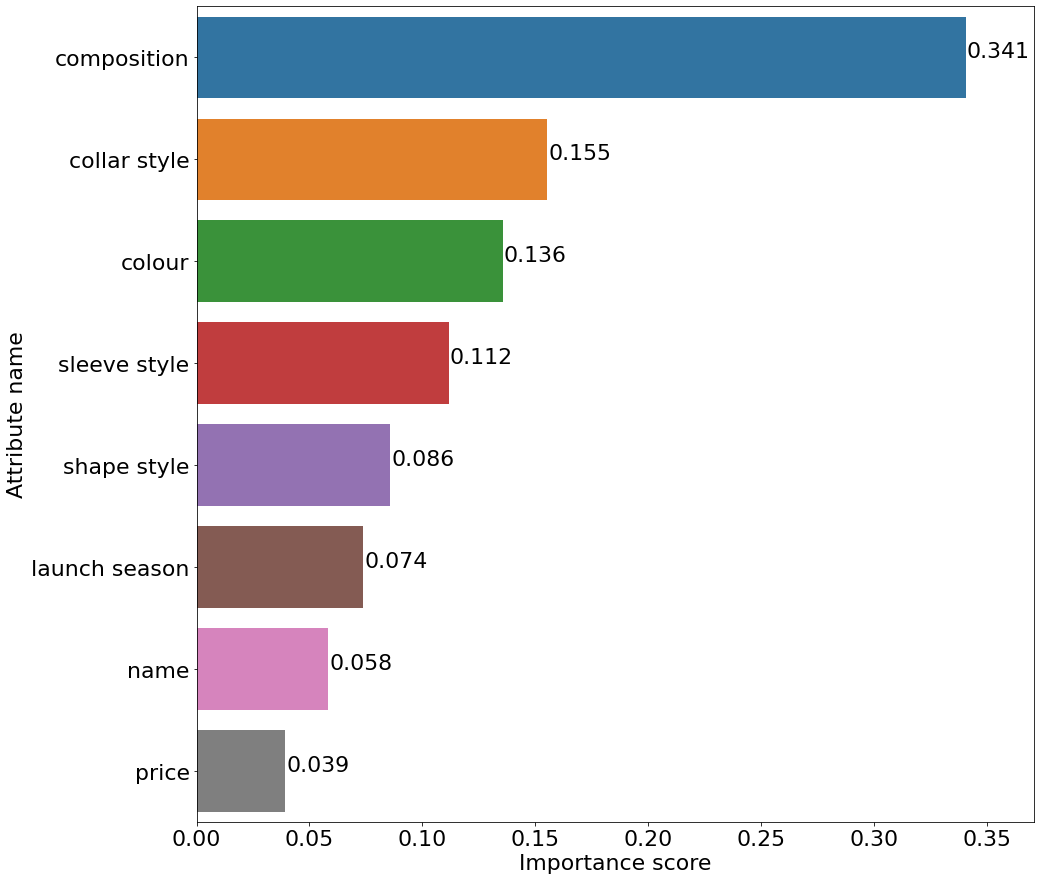

In [97]:
plt.figure(figsize=(15,15))
# sorted_counts = data_table['Elasthanne'].value_counts()
# print(sorted_counts.head())

full_fi_RF_table = pd.DataFrame(full_fi_RF)
full_fi_RF_table.index = attribute_name_list[:8]
full_fi_RF_table.rename(columns = {0:'importance score'},inplace = True)

full_fi_RF_table = full_fi_RF_table.sort_values(by ='importance score', ascending = False)

x_values = full_fi_RF_table.values.reshape(8,)

g = sns.barplot(y=full_fi_RF_table.index,
                x=x_values,
                orient = 'h')

g.set_ylabel('Attribute name', fontsize=22)
g.set_xlabel('Importance score', fontsize=22)

plt.xticks(fontsize = 22)
plt.yticks(fontsize = 22)
plt.xlim(0,x_values[0]+0.03)

for i in range(8):
    g.text(x_values[i]+5e-4,
           i,
           np.round(x_values[i],3), 
           color="black",ha="left",fontsize = 22)
plt.savefig("../../../saved_figs/Feature Importance/task1 FI XGB HUMAN ATTRI.pdf",dpi=1200,bbox_inches = 'tight')
plt.show()

# ------Task 2!--------

In [100]:
t2_RF = pd.read_csv('../../seasonality_pattern/task2 RF FI.csv', index_col = 0)
t2_XGB = pd.read_csv('../../seasonality_pattern/task2 XGB FI.csv', index_col = 0)

In [101]:
display(t2_RF)

,Feature,Importance
0,price,0.060155
1,12,0.052596
2,tshirt_standard_45/65cm,0.049178
3,col_rond,0.040879
4,manches_courtes,0.037942
...,...,...
65,dos_nu,0.000227
66,col_fendu,0.000211
67,Lyocell,0.000139
68,col_bénit,0.000096


In [111]:
t2_style_shape_list = ['tshirt_standard_45/65cm','tshirt_court_(45cm)','body','tshirt_long_(65cm)',
                   'tshirt_bandeau','tshirt_asymétrique','dos_nu','cache_coeur']

In [112]:
launch_month_list = [str(i) for i in range(1,13,1)]
task2_list = [price_list,name_list,t2_style_shape_list,style_sleeve_list,style_collar_list,launch_month_list,colour_list,composition_list]

attribute_name_list = ['price','name','shape style','sleeve style','collar style','launch month','colour','composition']

## task2 RF

In [119]:
task2_fi = [0,0,0,0,0,0,0,0]
count = 0
for i in range(len(t2_RF)):
    for j in range(len(task2_fi)):
        if t2_RF.loc[i,'Feature'] in task2_list[j]:
            task2_fi[j] += t2_RF.loc[i,'Importance']
            count+=1
            break
    if j==7 and t2_RF.loc[i,'Feature'] not in task2_list[j]:
                print(t2_RF.loc[i,'Feature'])
display(task2_fi)
print(count)

[0.060154896929175215,
 0.054711977802795096,
 0.05790792209834354,
 0.10113014701125696,
 0.08369487826720985,
 0.35656252203039723,
 0.1374794010960612,
 0.14835825476476086]

70


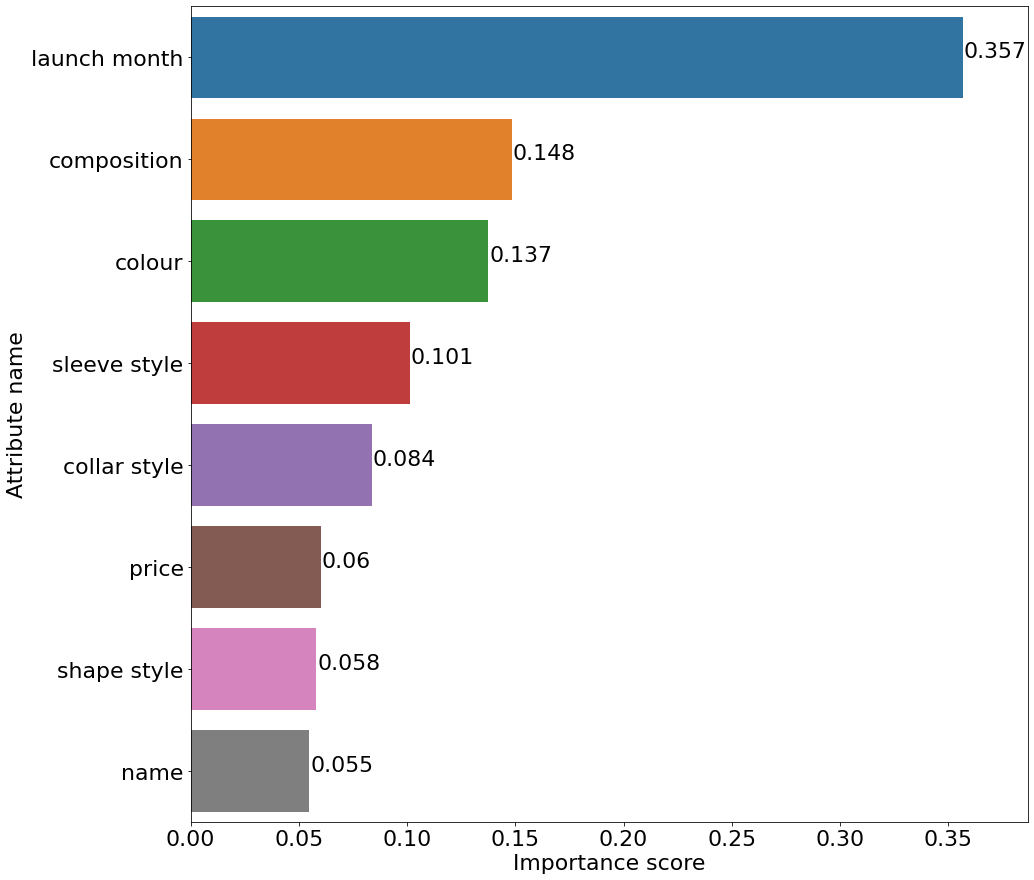

In [120]:
plt.figure(figsize=(15,15))
# sorted_counts = data_table['Elasthanne'].value_counts()
# print(sorted_counts.head())

full_fi_RF_table = pd.DataFrame(task2_fi)
full_fi_RF_table.index = attribute_name_list[:8]
full_fi_RF_table.rename(columns = {0:'importance score'},inplace = True)

full_fi_RF_table = full_fi_RF_table.sort_values(by ='importance score', ascending = False)

x_values = full_fi_RF_table.values.reshape(8,)

g = sns.barplot(y=full_fi_RF_table.index,
                x=x_values,
                orient = 'h')

g.set_ylabel('Attribute name', fontsize=22)
g.set_xlabel('Importance score', fontsize=22)

plt.xticks(fontsize = 22)
plt.yticks(fontsize = 22)
plt.xlim(0,x_values[0]+0.03)

for i in range(8):
    g.text(x_values[i]+5e-4,
           i,
           np.round(x_values[i],3), 
           color="black",ha="left",fontsize = 22)
plt.savefig("../../../saved_figs/task2/Feature Importance/task2 RF ATTRI.pdf",dpi=1200,bbox_inches = 'tight')
plt.show()

## task2 XGB

In [115]:
task2_fi = [0,0,0,0,0,0,0,0]
count = 0
for i in range(len(t2_XGB)):
    for j in range(len(task2_fi)):
        if t2_XGB.loc[i,'Feature'] in task2_list[j]:
            task2_fi[j] += t2_XGB.loc[i,'Importance']
            count+=1
            break
    if j==7 and t2_XGB.loc[i,'Feature'] not in task2_list[j]:
                print(t2_XGB.loc[i,'Feature'])
display(task2_fi)
print(count)

[0.011342268,
 0.0650024806,
 0.041699393200000004,
 0.071038684,
 0.0650016573,
 0.606944117,
 0.05486091919999999,
 0.0841104693]

70


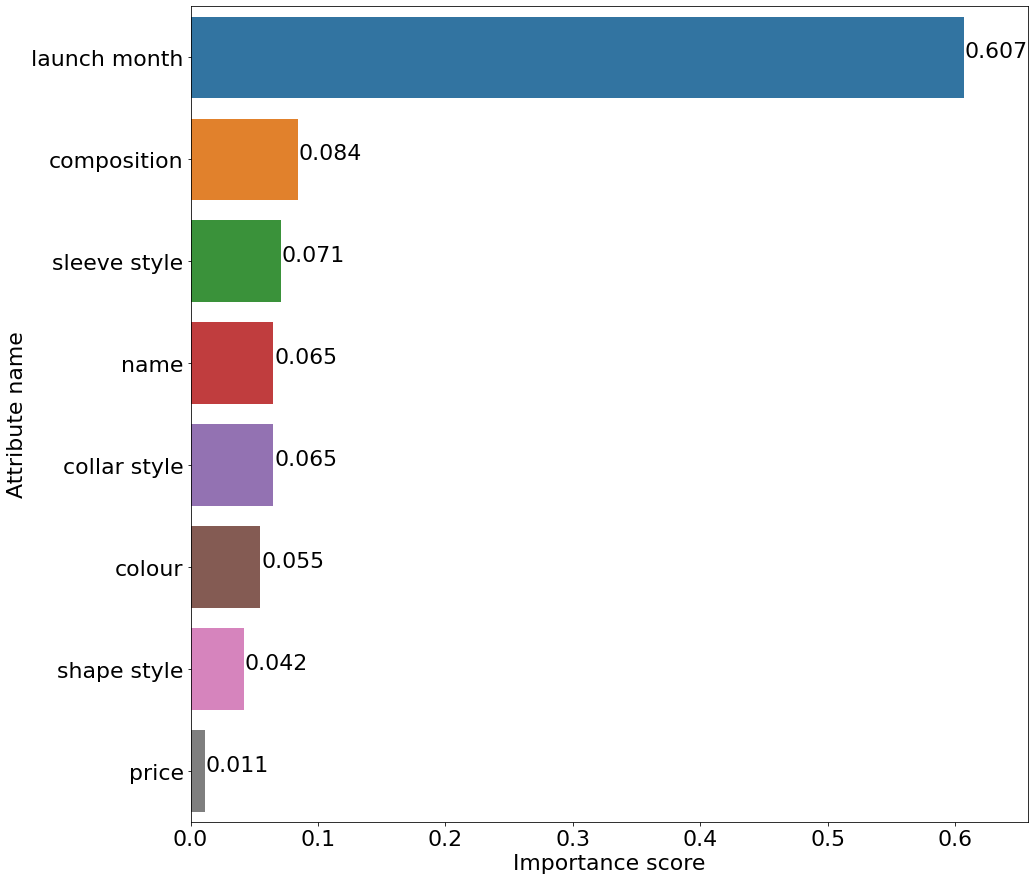

In [118]:
plt.figure(figsize=(15,15))
# sorted_counts = data_table['Elasthanne'].value_counts()
# print(sorted_counts.head())

full_fi_RF_table = pd.DataFrame(task2_fi)
full_fi_RF_table.index = attribute_name_list[:8]
full_fi_RF_table.rename(columns = {0:'importance score'},inplace = True)

full_fi_RF_table = full_fi_RF_table.sort_values(by ='importance score', ascending = False)

x_values = full_fi_RF_table.values.reshape(8,)

g = sns.barplot(y=full_fi_RF_table.index,
                x=x_values,
                orient = 'h')

g.set_ylabel('Attribute name', fontsize=22)
g.set_xlabel('Importance score', fontsize=22)

plt.xticks(fontsize = 22)
plt.yticks(fontsize = 22)
plt.xlim(0,x_values[0]+0.05)

for i in range(8):
    g.text(x_values[i]+5e-4,
           i,
           np.round(x_values[i],3), 
           color="black",ha="left",fontsize = 22)
plt.savefig("../../../saved_figs/task2/Feature Importance/task2 XGB ATTRI.pdf",dpi=1200,bbox_inches = 'tight')
plt.show()